# Lending Club Case Study

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

### Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company



###  Conclusion

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as - 
1. Denying the loan
2. Reducing the amount of loan
3. Lending (to risky applicants) at a higher interest rate, etc.

# Step 1 - Define Data Source and load data in a data frame which can be used for further analysis.


## Step 1a - Data Source

Load the data provided for Lending Club case study.


In [1]:
# Load dataset from github
# ! rm -rf ml-datasets
# ! git clone https://github.com/prateekgithub/ml-datasets.git
# ! ls ml-datasets/lending_club_case_study

## Step 1b - Data Loading
Load provided data to data frame df_loan_records for further processing.

In [2]:
# Import required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set display format 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Load provided data to data frame
df_loan_records = pd.read_csv("loan.csv", low_memory=False, encoding="UTF-8")
df_loan_records.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


# Step 2 - Data Cleaning
Clean the data based on missing values, outliers, data redundancies etc.

## Step 2a - Remove columns with all values as null or empty.

In [3]:
df_loan_records.dropna(axis='columns', how='all', inplace=True)
print(df_loan_records.shape)
df_loan_records.head()

(39717, 57)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


## Step 2b  - Drop columns with only one distinct value as it will not provide meaningful data for analysis.

In [4]:
df_loan_records = df_loan_records[[col for col in list(df_loan_records) if len(df_loan_records[col].unique()) > 1]]
print(df_loan_records.shape)
df_loan_records.head()

(39717, 51)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,0.00,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,0.00,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,0.00,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,0.00,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,0.00,0.00,0.00


## Step 2c - Drop columns with values only either 0 or NaN(null)

In [5]:
# Drop dataframe columns with only two distinct values 0 and NaN
for col in df_loan_records.columns:
  values = df_loan_records[col].unique()
  if len(values) == 2 and pd.isnull(values).any() and 0 in values:
    df_loan_records.drop(col,inplace=True,axis=1)
print(df_loan_records.shape)
df_loan_records.head()

(39717, 48)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00


## Step 2d - Drop columns having less than 10% data as such columns will not contribute decisive data for analysis.

In [6]:
# Drop missing value above threshold of 90%.
df_loan_records.dropna(thresh=len(df_loan_records)*0.9, axis='columns',inplace=True)
print(df_loan_records.shape)
df_loan_records.head()

(39717, 44)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


## Step 2e - Drop columns which have redundant or unwanted data for analysis

In [7]:
#drop columns through observation which do not add value to analysis
# url field is not providing useful information also only unique entry in url is already present in id.
df_loan_records.drop(columns=['url'],inplace=True)

#loan_amnt and funded_amnt are giving almost similar entry. Also funded_amnt is the actual amount on which interest
# will be paid hence dropping loan amount.
df_loan_records.drop(columns=['loan_amnt'],inplace=True)

# Similar to above funded_amnt and funded_amnt_inv also gives alomost similar data. Also funded_amnt is the actual amount 
#on which interest will be paid hence dropping funded_amnt_inv. Since we are calculating correlation of Lending Club
# loan appprovals with respect to parameters related to member applied loan, fields related to Lending club investors
# will not contrbute significantly hence we can remove fields -  'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv'
df_loan_records.drop(columns=['funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv'],inplace=True)


# Merge zip code and state and drop independent columns
df_loan_records['zip_code'] = df_loan_records['zip_code'].str.strip('x')
#df_loan_records['zip_state'] = df_loan_records['zip_code'] +'_'+ df_loan_records['addr_state']
df_loan_records.drop(columns=['zip_code'],inplace=True)
df_loan_records.head()



,id,member_id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5863.16,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


In [8]:
# Check if id and member_id are unique
print(df_loan_records['id'].nunique())

print(df_loan_records['member_id'].nunique())

# Since both the records are unique we can drop member_id and convert id to str as id is not numerical quantity.
df_loan_records.drop(columns=['member_id'],inplace=True)
df_loan_records['id'] = df_loan_records['id'].astype(str)
df_loan_records.head()


39717
39717


,id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,...,5863.16,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


In [9]:
# Check pub_rec_bankruptcies for unique
print(df_loan_records['pub_rec_bankruptcies'].unique())

[ 0.  1.  2. nan]


## Step 2f - Perform data manipulation on column data for rows.

In [10]:
# Convert term into numeric data
df_loan_records['term'] = df_loan_records['term'].str.strip().str[0:2]
df_loan_records['term'] = pd.to_numeric(df_loan_records['term'])

In [11]:
# Convert percentage to float in int_rate and revol_util
df_loan_records['int_rate'] = df_loan_records['int_rate'].str.rstrip('%').astype('float') / 100.0
df_loan_records['revol_util'] = df_loan_records['revol_util'].str.rstrip('%').astype('float') / 100.0

# Convert emp_length to numeric data for further analysis
# if emp_length is not available - np.nan, it is considered to be zero (0)
df_loan_records['emp_length'].replace([ np.nan,"< 1 year", "1 year", "2 years","3 years",
                                      "4 years", "5 years", "6 years", "7 years", "8 years",
                                      "9 years", "10+ years"], [0,0,1,2,3,4,5,6,7,8,9,10],inplace = True)

In [12]:
# Convert columns with date data in obj format to date format
df_loan_records['issue_d'] = pd.to_datetime(df_loan_records['issue_d'],format='%b-%y')
df_loan_records['last_pymnt_d'] = pd.to_datetime(df_loan_records['last_pymnt_d'], format='%b-%y')
df_loan_records['last_credit_pull_d'] = pd.to_datetime(df_loan_records['last_credit_pull_d'], format='%b-%y')
df_loan_records['earliest_cr_line'] = pd.to_datetime(df_loan_records['earliest_cr_line'], format='%b-%y')

In [13]:
# Other values to consider - 

# in absence of last_credit_pull_d, it is set to issue_d as credit report should have been pulled before issuing loan
df_loan_records['last_credit_pull_d'] = np.where(pd.isnull(df_loan_records['last_credit_pull_d']), df_loan_records['issue_d'], df_loan_records['last_credit_pull_d'])

# in absence of revol_util, it is set to installment amount * 12 months as a percentage of income //thought process...
#df_loan_records['revol_util'] = np.where(pd.isnull(df_loan_records['revol_util']), (df_loan_records['installment']*12*100)/df_loan_records['annual_inc'], df_loan_records['revol_util'])

# set to numeric marker value of -1 (can be 0 - need to agree as a team) - set to 0
df_loan_records['pub_rec_bankruptcies'] = np.where(pd.isnull(df_loan_records['pub_rec_bankruptcies']), -1, df_loan_records['pub_rec_bankruptcies'])

#Fill NA for blanks
df_loan_records.fillna({'emp_title':'NA', 'title':'NA'}, inplace=True)
df_loan_records['emp_title'] = df_loan_records['emp_title'].str.title()
df_loan_records['emp_title'].replace(r'([Uu])[nited]*[. ]*([Ss])[tates]*[. ]*Army', r'\1\2 Army', regex=True,inplace = True)

# Data Analysis - 


In [15]:
#df_loan_records.to_excel("df_loan_records.xlsx", sheet_name='df_loan_records')

In [16]:
# Finding numerical features
numeric_data = df_loan_records.select_dtypes(include = [np.number])

# Finding categorical features
categorical_data = df_loan_records.select_dtypes(exclude = [np.number])

#Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))
print(numeric_data.columns)
print(categorical_data.columns)

# Fields to take consider id and memberid

There are 23 numerical and 14 categorical features in the training data
Index(['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')
Index(['id', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')


Can be removed - 
ignoredcolumns = [
    'url', 'member_id', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv',
    'title','recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
    'last_pymnt_d', 'home_ownership'
]

1. Debt consolidation in purpose is ~49%

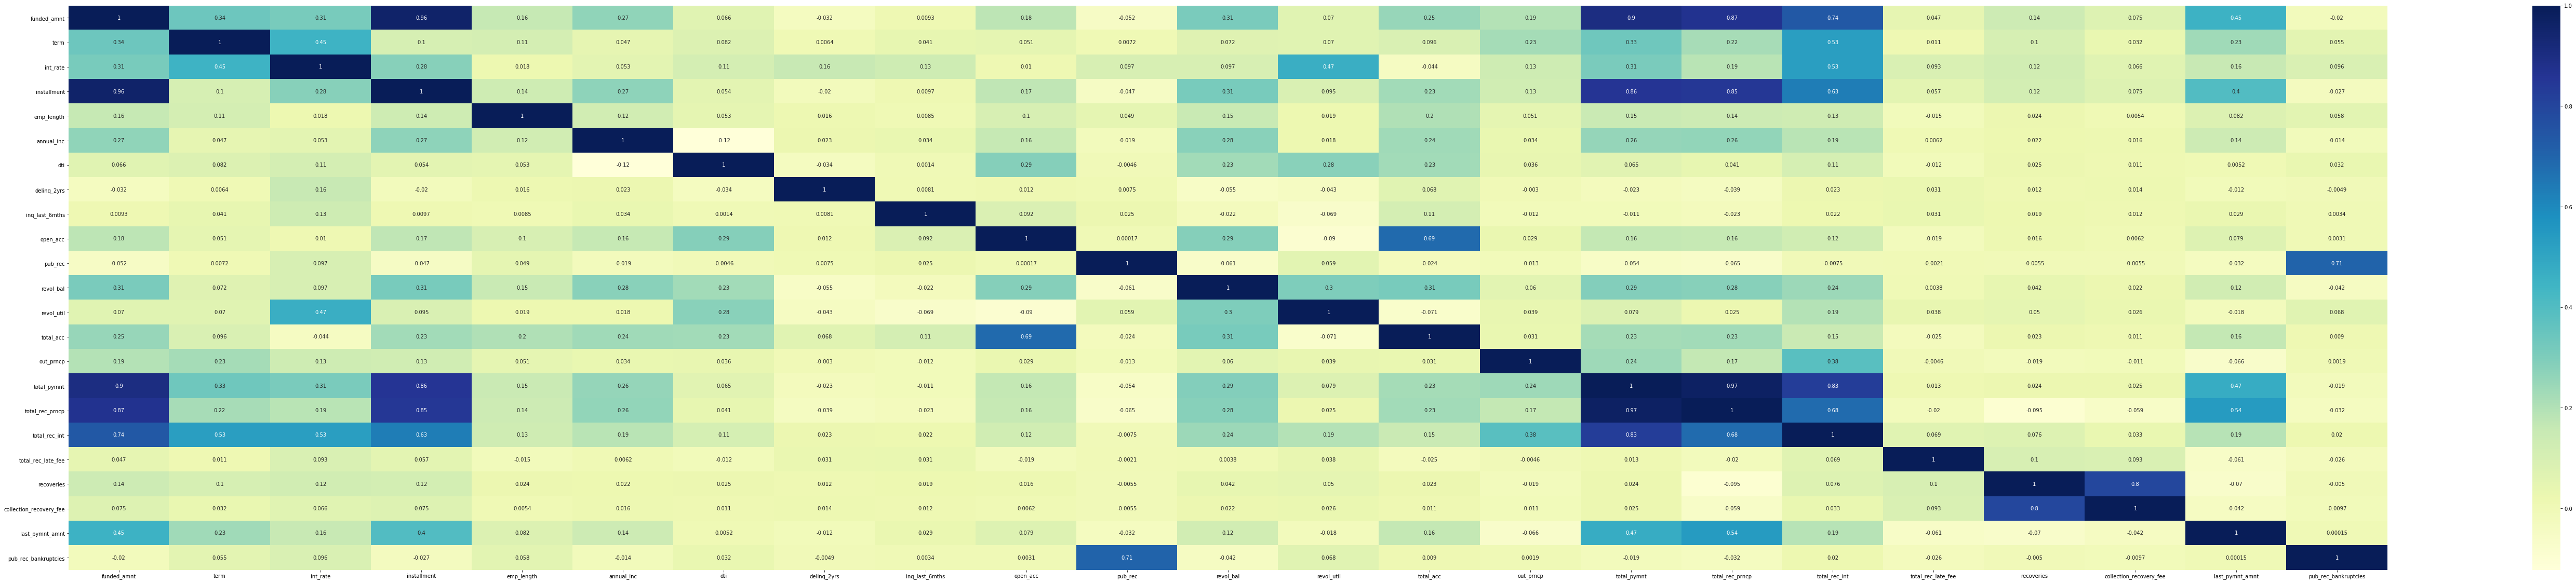

In [17]:
# Correlation plot of the features in numeric_data
corr = numeric_data.corr()
round(corr, 3)
# figure size
plt.figure(figsize=(100,20))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [18]:
# Drop columns where missing value is above threshod of 90%

#Missing value counts in each columns

missing_count = (df_loan_records.isnull().sum() / len(df_loan_records)) * 100

# Filter to find the missing count > 0

missing_count = missing_count[missing_count > 0]

print(missing_count.sort_values())

revol_util     0.13
last_pymnt_d   0.18
dtype: float64


In [19]:
def numerical_plot(colname, label): 
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    # Count Plot
    sns.distplot(df_loan_records.loc[df_loan_records[colname].notnull(), colname], kde=False, ax=ax1)
    ax1.set_xlabel(label)
    ax1.set_ylabel('Count')
    ax1.set_title(label)
    
    # Box Plot with loan status
    sns.boxplot(x=colname, y='loan_status', data=df_loan_records, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_title(label + ' by Loan Status')
    ax2.set_xlabel(label)
    
    plt.tight_layout()

In [20]:
def categorical_plot(colname, label): 
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    # Count Plot
    sns.countplot(df_loan_records[colname], order=sorted(df_loan_records[colname].unique()), color='#5975A4', ax=ax1)
    ax1.set_xlabel(label)
    ax1.set_ylabel('Count')
    ax1.set_title(label)
    
    #Plot with loan status
    charge_off_rates = df_loan_records.groupby(colname)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
    sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', ax=ax2)
    ax2.set_ylabel('Charged-off of Loans')
    ax2.set_title('Charge-off Rate by ' + label)
    ax2.set_xlabel(label)
    
    plt.tight_layout()

In [21]:
#def categorical_plot_withinCat(colname,label):
#    charge_off_rates = df_loan_records.groupby(colname)['loan_status'].filter('loan_status'=='Charged Off').value_counts(normalize=True).loc[:,'Charged Off']
#    sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', ax=ax2)
#    ax2.set_ylabel('Charged-off of Loans')
#    ax2.set_title('Charge-off Rate by ' + label)
#    ax2.set_xlabel(label)
# df_loan_records.groupby('home_ownership')['loan_status'].loc[:,'Charged Off'].head()
#filter(df_loan_records['loan_status']=='Charged Off').head(5)
#.groupby('home_ownership')['loan_status'].count()
#.filter(df_loan_records['loan_status']=='Charged Off').head()

In [22]:
#EDA of Key Attrubute and Features
#Loan Amount
df_loan_records['funded_amnt'].describe()

count   39717.00
mean    10947.71
std      7187.24
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

In [23]:
df_loan_records.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.00,11753.40,7760.52,900.00,5575.00,10000.00,16000.00,35000.00
Current,1140.00,16485.70,8183.57,1000.00,11575.00,15225.00,21281.25,35000.00
Fully Paid,32950.00,10618.52,6956.05,500.00,5050.00,9200.00,14500.00,35000.00


C:\Users\prate\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


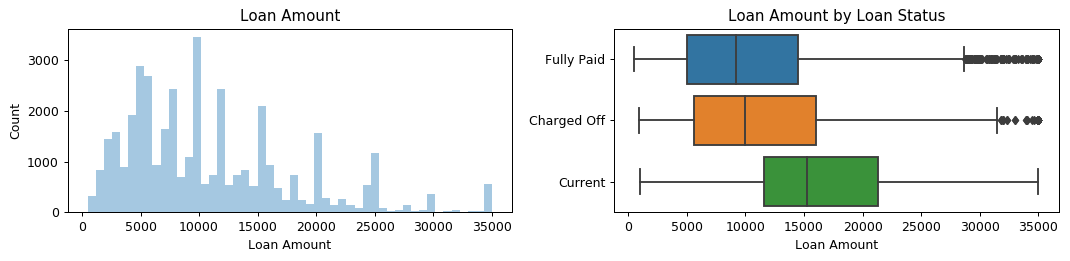

In [ ]:
numerical_plot('funded_amnt', 'Loan Amount')

In [ ]:
#Home Ownership
df_loan_records['home_ownership'].describe()

count     39717
unique        5
top        RENT
freq      18899
Name: home_ownership, dtype: object

In [ ]:
df_loan_records.groupby('home_ownership')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
home_ownership,,,,,,,,
MORTGAGE,17659.00,12321.82,7727.19,500.00,6000.00,10200.00,16000.00,35000.00
NONE,3.00,5600.00,3857.46,2800.00,3400.00,4000.00,7000.00,10000.00
OTHER,98.00,10148.72,5784.03,1000.00,5125.00,9000.00,15000.00,25000.00
OWN,3058.00,10049.40,6838.57,900.00,5000.00,8000.00,14000.00,35000.00
RENT,18899.00,9814.11,6468.63,500.00,5000.00,8000.00,13000.00,35000.00


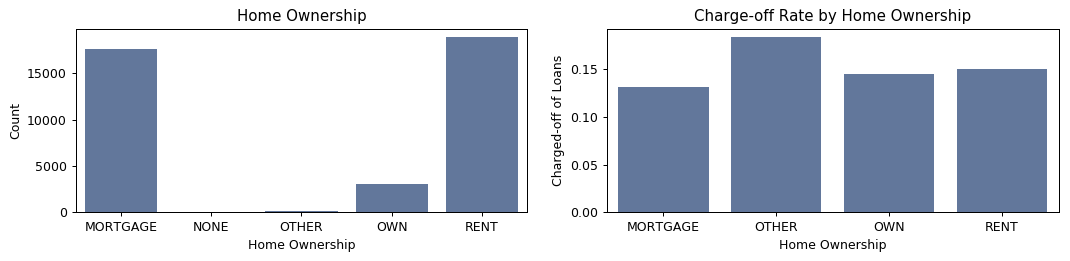

In [ ]:
categorical_plot('home_ownership', 'Home Ownership')

In [ ]:
#Grade
df_loan_records['grade'].describe()

count     39717
unique        7
top           B
freq      12020
Name: grade, dtype: object

In [ ]:
df_loan_records.groupby('grade')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,10085.00,8402.42,5142.73,500.00,5000.00,7200.00,10800.00,35000.00
B,12020.00,10861.34,6964.55,500.00,5200.00,10000.00,15000.00,35000.00
C,8098.00,10779.26,7044.76,500.00,5000.00,9600.00,15000.00,35000.00
D,5307.00,12069.79,7419.49,1000.00,6000.00,10000.00,16000.00,35000.00
E,2842.00,15254.33,8512.11,1000.00,8400.00,15000.00,20000.00,35000.00
F,1049.00,17688.42,8880.80,1200.00,10500.00,17500.00,25000.00,35000.00
G,316.00,19828.64,8326.33,1600.00,14000.00,20000.00,25000.00,35000.00


In [ ]:
df_loan_records.groupby('grade')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,10085.00,8402.42,5142.73,500.00,5000.00,7200.00,10800.00,35000.00
B,12020.00,10861.34,6964.55,500.00,5200.00,10000.00,15000.00,35000.00
C,8098.00,10779.26,7044.76,500.00,5000.00,9600.00,15000.00,35000.00
D,5307.00,12069.79,7419.49,1000.00,6000.00,10000.00,16000.00,35000.00
E,2842.00,15254.33,8512.11,1000.00,8400.00,15000.00,20000.00,35000.00
F,1049.00,17688.42,8880.80,1200.00,10500.00,17500.00,25000.00,35000.00
G,316.00,19828.64,8326.33,1600.00,14000.00,20000.00,25000.00,35000.00


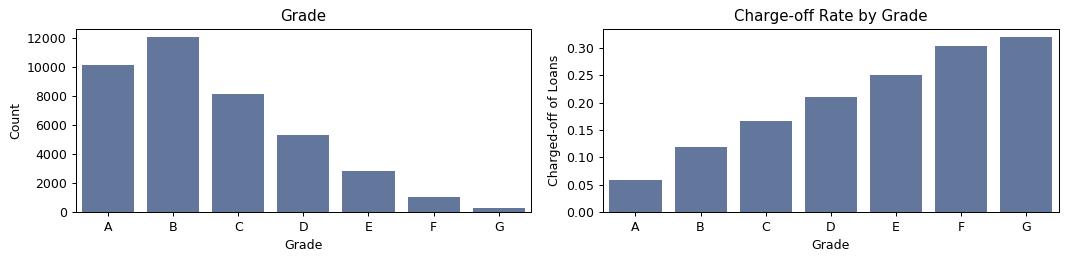

In [ ]:
categorical_plot('grade', 'Grade')

In [ ]:
df_loan_records['sub_grade'].describe()

count     39717
unique       35
top          B3
freq       2917
Name: sub_grade, dtype: object

In [ ]:
#Too Many rows Plot directly
#df_loan_records.groupby('sub_grade')['loan_amnt'].describe()

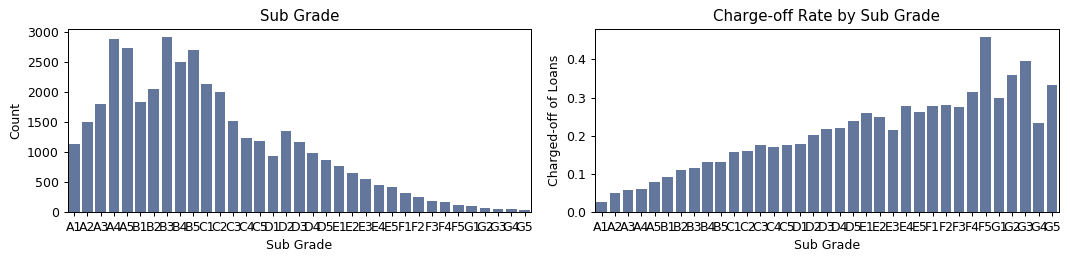

In [ ]:
categorical_plot('sub_grade', 'Sub Grade')

In [ ]:
#Drop Employee Title is better.
#Running for Emoloyee Length
df_loan_records['emp_length'].describe()

count   39717.00
mean        4.84
std         3.61
min         0.00
25%         2.00
50%         4.00
75%         9.00
max        10.00
Name: emp_length, dtype: float64

In [ ]:
df_loan_records['emp_length'].value_counts(dropna=False).sort_index()

0     5658
1     3240
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
10    8879
Name: emp_length, dtype: int64

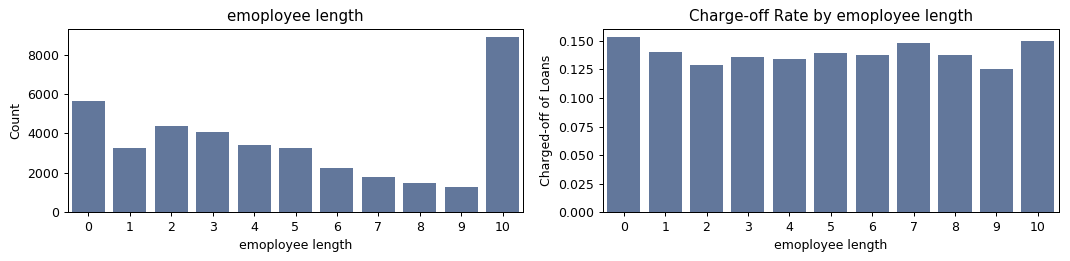

In [ ]:
#Employee Length May be number but has discrete to it, so Only Categorical Plot
categorical_plot('emp_length', 'emoployee length')

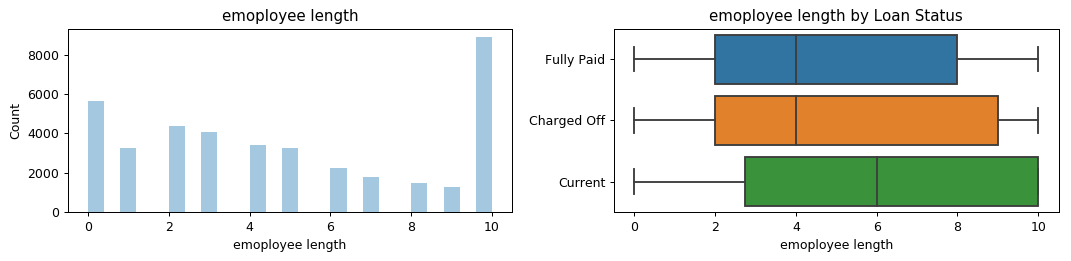

In [ ]:
numerical_plot('emp_length', 'emoployee length')

In [ ]:
#verification Status
df_loan_records['verification_status'].describe()

count            39717
unique               3
top       Not Verified
freq             16921
Name: verification_status, dtype: object

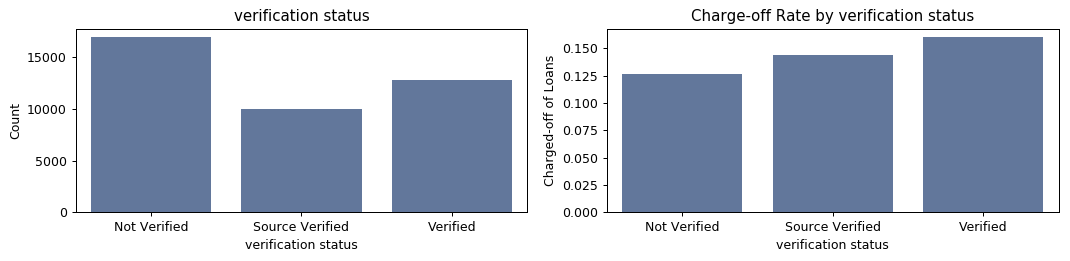

In [ ]:
categorical_plot('verification_status', 'verification status')

In [ ]:
df_loan_records['purpose'].describe()

count                  39717
unique                    14
top       debt_consolidation
freq                   18641
Name: purpose, dtype: object

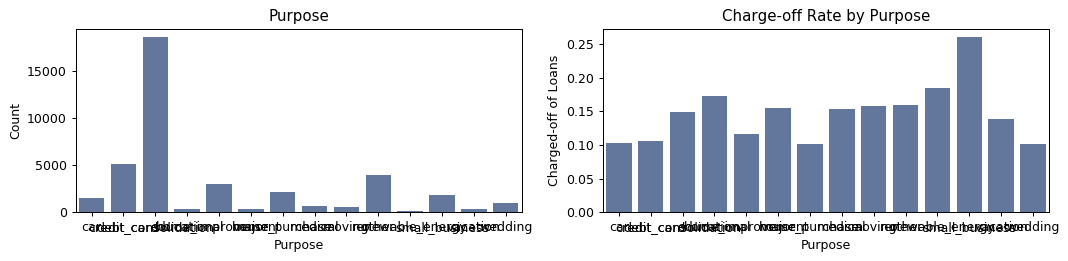

In [ ]:
categorical_plot('purpose', 'Purpose')

In [ ]:
df_loan_records['installment'].describe()

count   39717.00
mean      324.56
std       208.87
min        15.69
25%       167.02
50%       280.22
75%       430.78
max      1305.19
Name: installment, dtype: float64

In [ ]:
#categorical_plot('installment', 'Installment')

In [ ]:
df_loan_records['addr_state'].describe()

count     39717
unique       50
top          CA
freq       7099
Name: addr_state, dtype: object

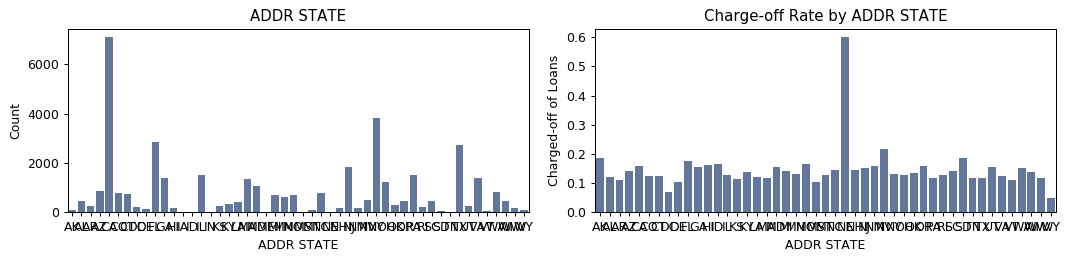

In [ ]:
categorical_plot('addr_state', 'ADDR STATE')

In [ ]:
# Count plots of categorical features
f = pd.melt(df_loan_records, id_vars=['funded_amnt'], value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'funded_amnt')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

C:\Users\prate\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\prate\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
